# Conoscere l'Intelligenza Artificiale
***
## Lezione 1 - Perceptron Training


# Importiamo quello che ci serve

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Carichiamo i Dati

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/alberto-rota/Conoscere-l-Intelligenza-Artificiale/main/razzi.csv")
data = data[["lunghezza","larghezza","atterrato"]]

# Visualizziamo i primi 10


In [ ]:
data.shape

(500, 3)

In [ ]:
data.head(20)

,lunghezza,larghezza,atterrato
0,3.035080,1.190104,True
1,2.839071,1.249286,False
2,2.754067,1.274646,False
3,3.086515,1.276114,True
4,3.181583,1.260993,True
5,2.761620,0.832626,True
6,3.154658,1.047827,True
7,2.539231,1.194890,False
8,2.664835,0.885414,True
9,2.986107,0.855542,True


# Ispezioniamo i Dati

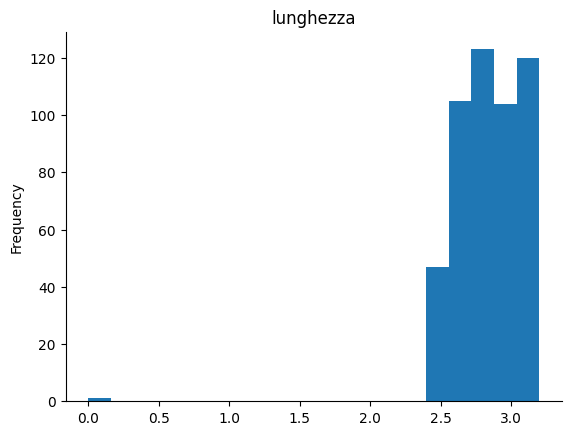

In [ ]:
data['lunghezza'].plot(kind='hist', bins=20, title='lunghezza')
plt.gca().spines[['top', 'right',]].set_visible(False)

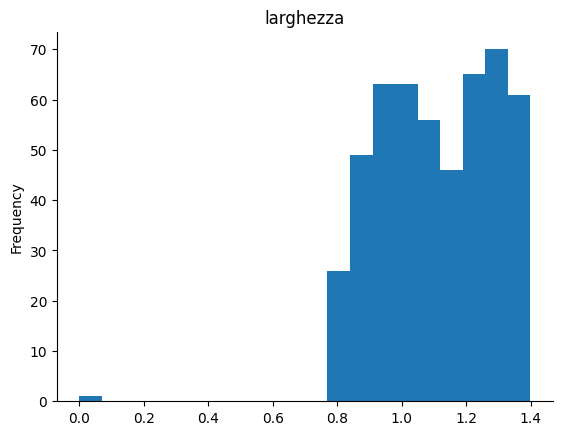

In [ ]:
data['larghezza'].plot(kind='hist', bins=20, title='larghezza')
plt.gca().spines[['top', 'right',]].set_visible(False)

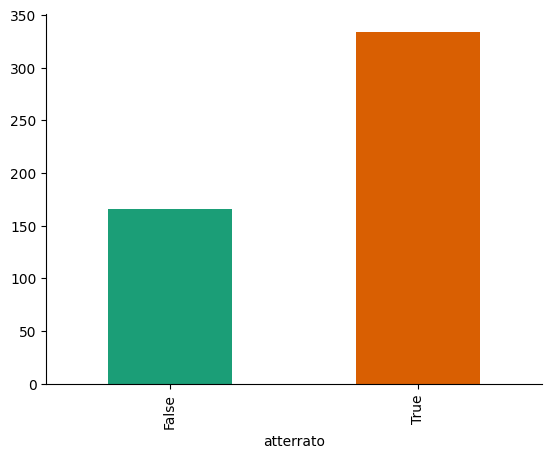

In [ ]:
data.groupby('atterrato').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Eliminiamo i dati sbagliati


In [ ]:
data = data.drop(12,axis="rows")

In [ ]:
data.head(20)

,lunghezza,larghezza,atterrato
0,3.035080,1.190104,True
1,2.839071,1.249286,False
2,2.754067,1.274646,False
3,3.086515,1.276114,True
4,3.181583,1.260993,True
5,2.761620,0.832626,True
6,3.154658,1.047827,True
7,2.539231,1.194890,False
8,2.664835,0.885414,True
9,2.986107,0.855542,True


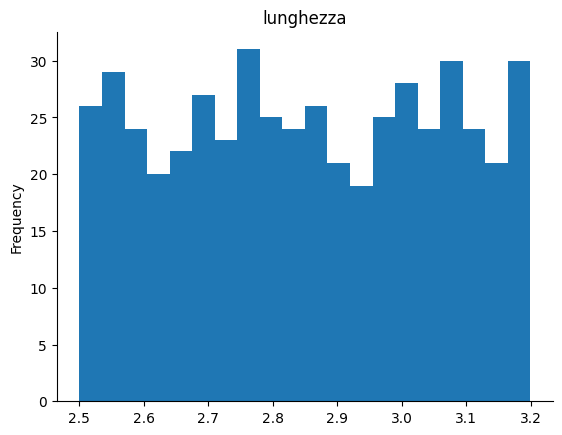

In [ ]:
data['lunghezza'].plot(kind='hist', bins=20, title='lunghezza')
plt.gca().spines[['top', 'right',]].set_visible(False)

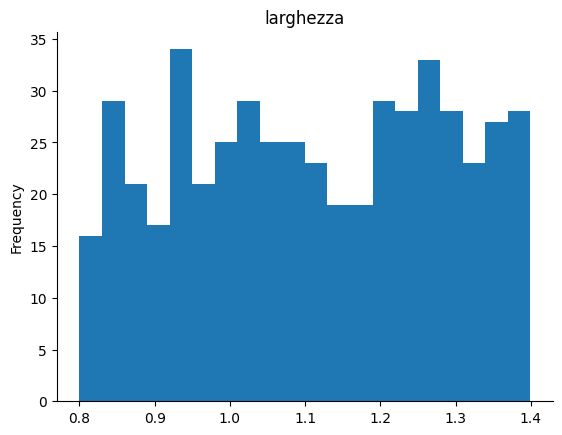

In [ ]:
data['larghezza'].plot(kind='hist', bins=20, title='larghezza')
plt.gca().spines[['top', 'right',]].set_visible(False)

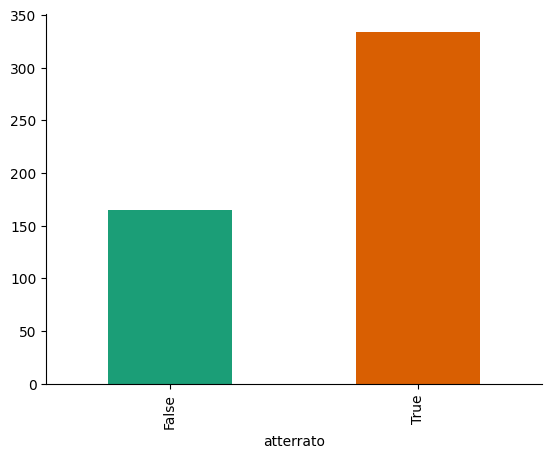

In [ ]:
data.groupby('atterrato').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Visualizziamo i Dati

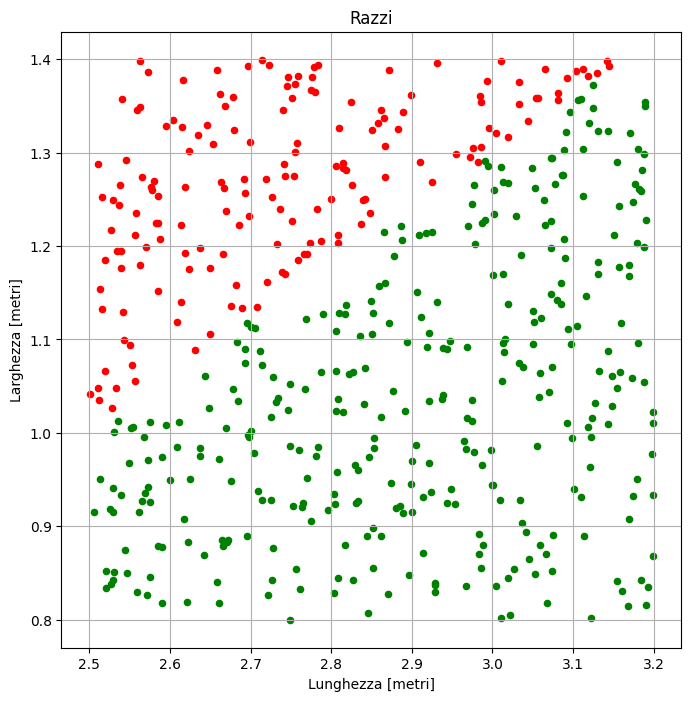

In [ ]:
def show_dataset(data, ax):
    data[data['atterrato']==1].plot(kind='scatter', ax=ax, x='lunghezza', y='larghezza', color='green')
    data[data['atterrato']==0].plot(kind='scatter', ax=ax, x='lunghezza', y='larghezza', color='red')
    plt.xlabel("Lunghezza [metri]")
    plt.ylabel("Larghezza [metri]")
    plt.grid()
    plt.title('Razzi')
fig = plt.figure(figsize=(8,8))
show_dataset(data, fig.gca())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer

    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture

    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.sum(output_prev == output)
        return error_calculation

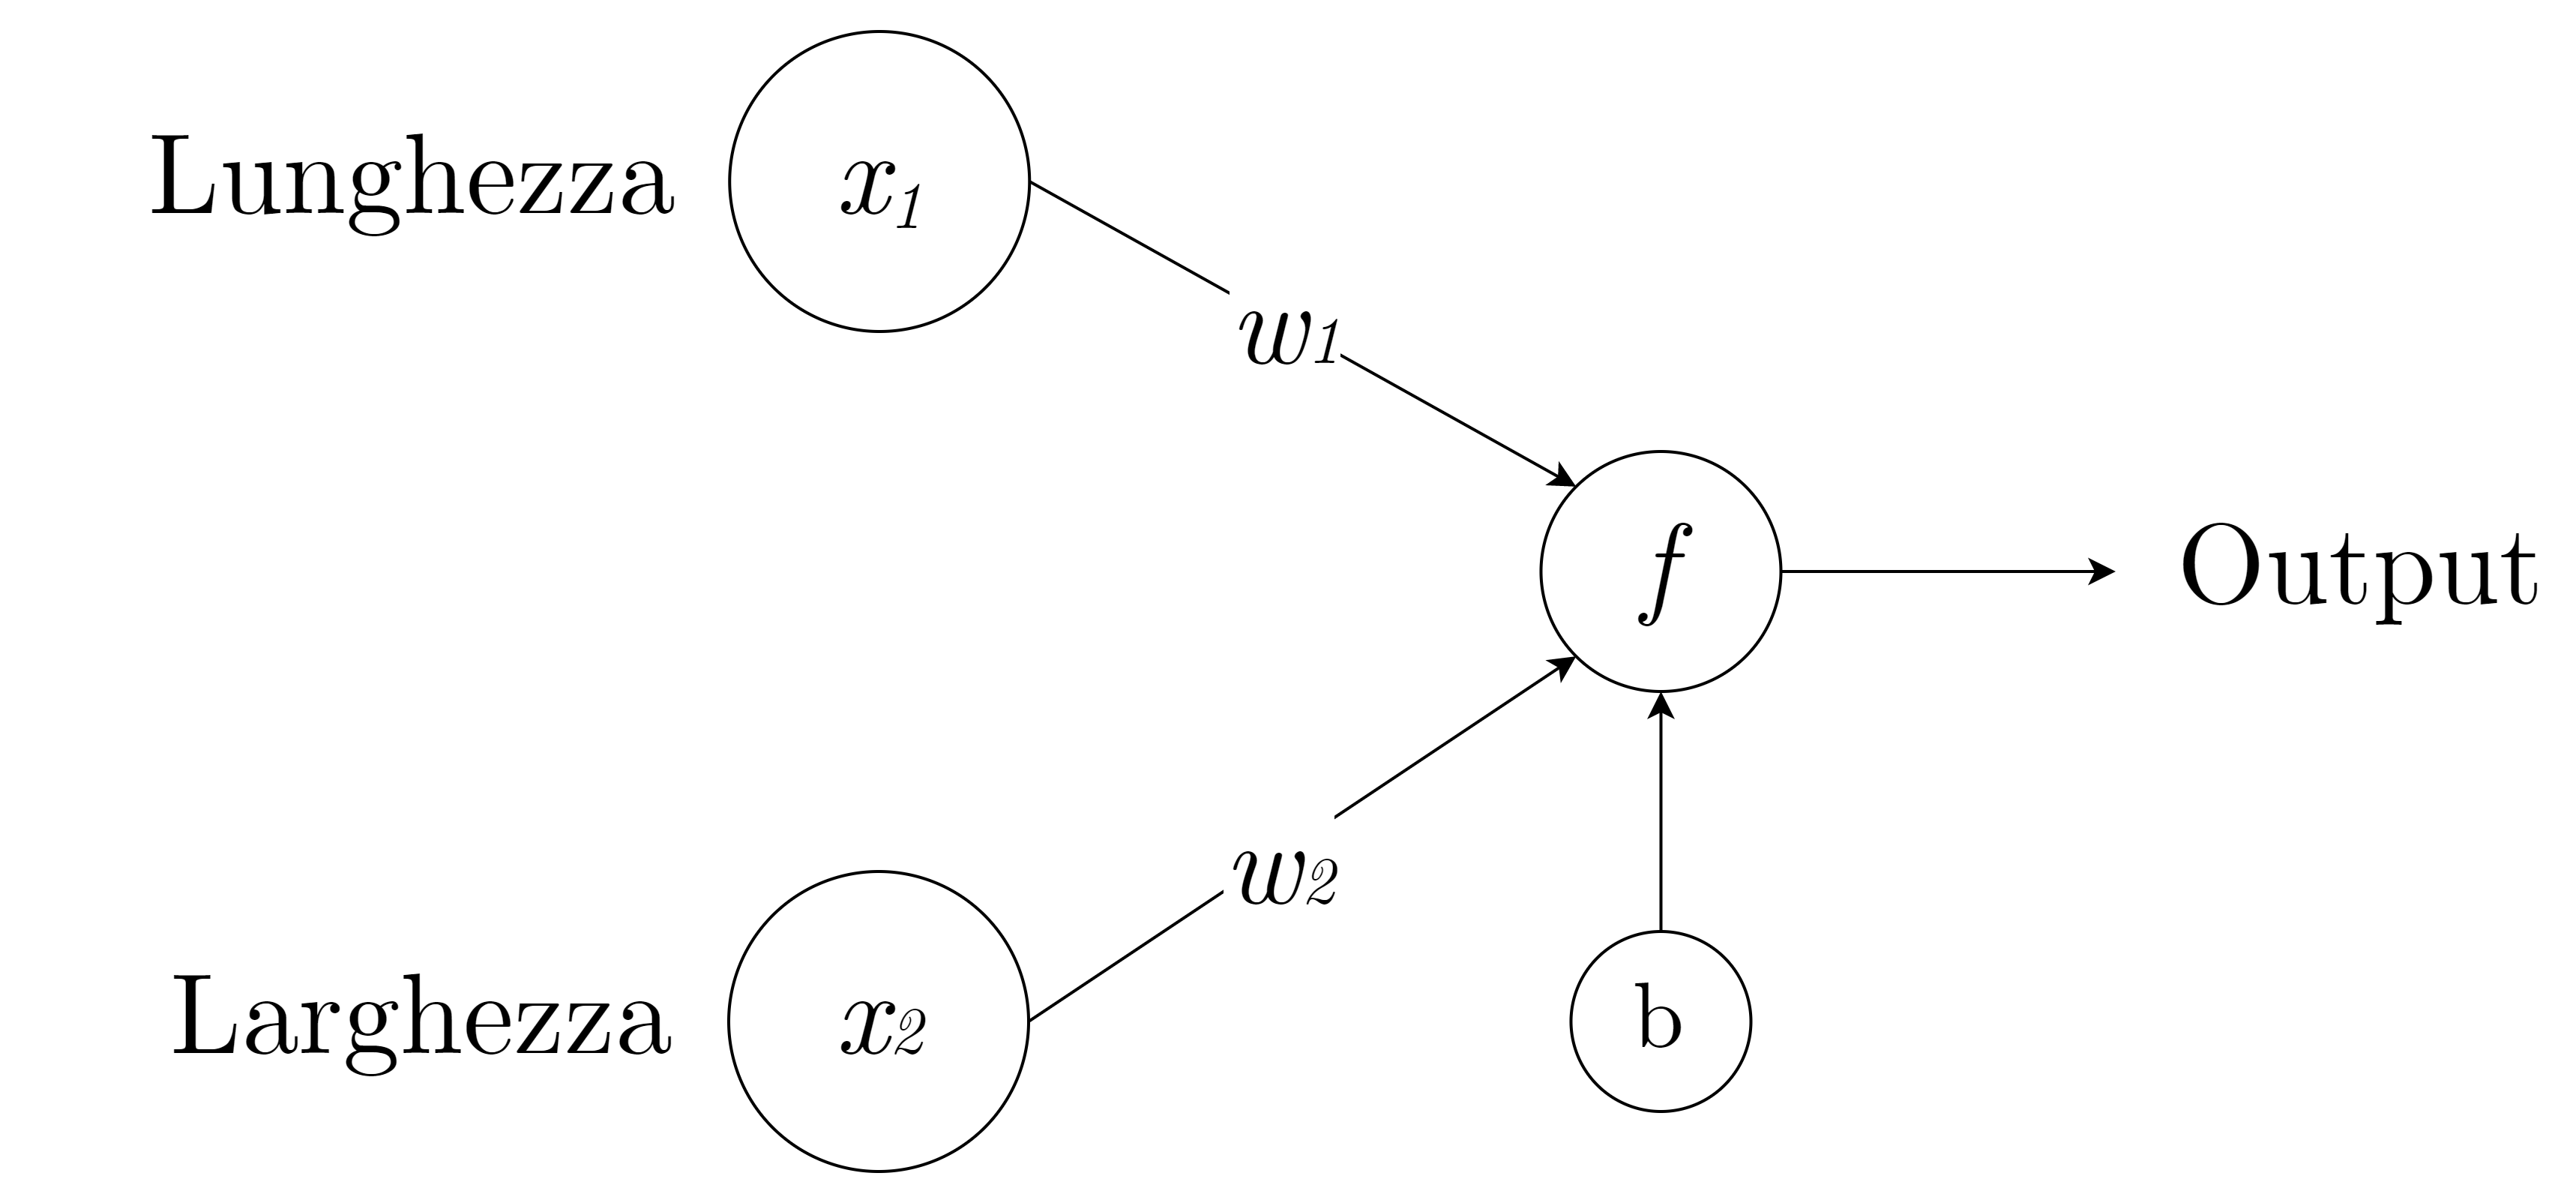

## Perceptron Output

$
y= w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b
$

## Perceptron Learning

$
\hat{w_i} = w_i + \alpha (y - \hat{y}) x_{i}
$

$
\hat{b} = b + \alpha (y - \hat{y})\,.
$

In [ ]:
import random, itertools

InitialWeights = np.array([-0.3,-0.3])+np.random.normal(2,1)*0.01
InitialBias = 1.1
LearningRate = 0.05
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="blue")
    # ax.set_xlim(2.5,3,2)
    # ax.set_ylim(0.8,1.4)

# f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
until = 100
accuracies = []
for interaction in range(until):
    showAll(SLperceptron, data, interaction)
    error = trainingData(SLperceptron, data)
    acc = error/500*100
    accuracies.append(acc)
    title = f"Tentativo {interaction + 1} :   W1 = {SLperceptron.weights[0]:.2f}   W2 = {SLperceptron.weights[1]:.2f}   B={SLperceptron.bias:.2f} --> Acc={acc:.2f}%"
    plt.title(title)
    sig = input("Enter per proseguire, 'stop' per terminare\n")
    plt.show()
    if sig == "stop":
        break

Output hidden; open in https://colab.research.google.com to view.

# Controlliamo il progresso

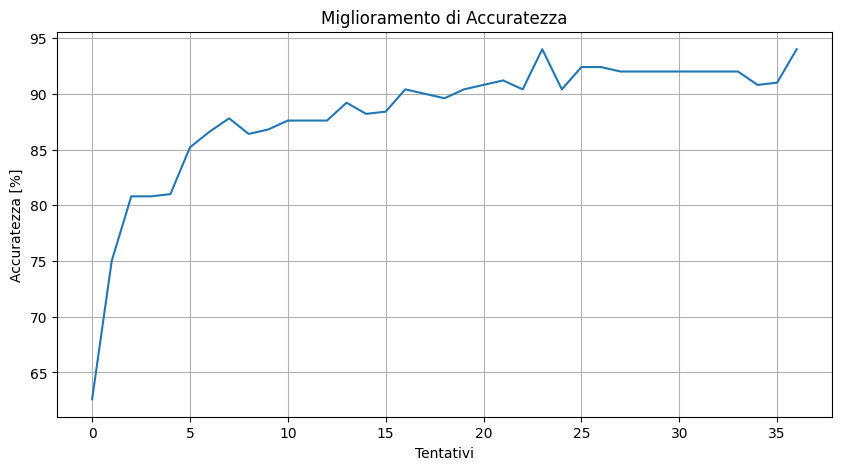

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(accuracies)
plt.xlabel("Tentativi")
plt.ylabel("Accuratezza [%]")
plt.title("Miglioramento di Accuratezza")
plt.grid(True)
plt.show()